In [ ]:
# RQ:选股测试 均线/量BOLL  ，时间格式有问题，暂时没有解决

In [ ]:
import time
import datetime
from funcat import * #FUNCAT的同花顺/通达信指标模块：和：&，或：|，其他基本相同。可以使用指标选股！！！
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=300) #准备数据，倒推300天！！！
    yesterday=today-oneday  
    return yesterday
run_start_date = (getYesterday())#开始时间
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=20) #10天
    yesterday=today-oneday  
    return yesterday
open_start_date = (getYesterday())# 输出前N天日期
open_end_date = (time.strftime("20%y%m%d"))## 20yymmdd格式，输出当日日期
from funcat.data.tushare_backend import TushareDataBackend
from funcat.data.rqalpha_data_backend import RQAlphaDataBackend
backend = "RQ" #本地数据，如果修改tushare改tushare在线数据连接
if backend == "RQ":
    set_data_backend(RQAlphaDataBackend())
elif backend == "TU":
    set_data_backend(TushareDataBackend())
set_start_date(run_start_date)
print ("选股开始时间：==》",("%s" % datetime.datetime.now().isoformat() )) 
print ("量BOLL选股开始=》")
select(
    lambda : CROSS((VOL/(LOW)), ((MA(((VOL/(HIGH))+(VOL/(LOW)))/2, 27)) - STD((VOL/(HIGH)), 27) * 1.618)), \
    start_date=(open_start_date), end_date=(open_end_date), )
print ("《=量BOLL选股结束")
print ("均线选股开始=》")
select(
    lambda : CROSS(LOW, MA(LOW,7)) and CROSS(HIGH, MA(LOW,10)), \
    start_date=(open_start_date), end_date=(open_end_date), )
print ("《=均线选股结束")
print ("《结束选股》读取结束时间：==》",("%s" % datetime.datetime.now().isoformat() )) 

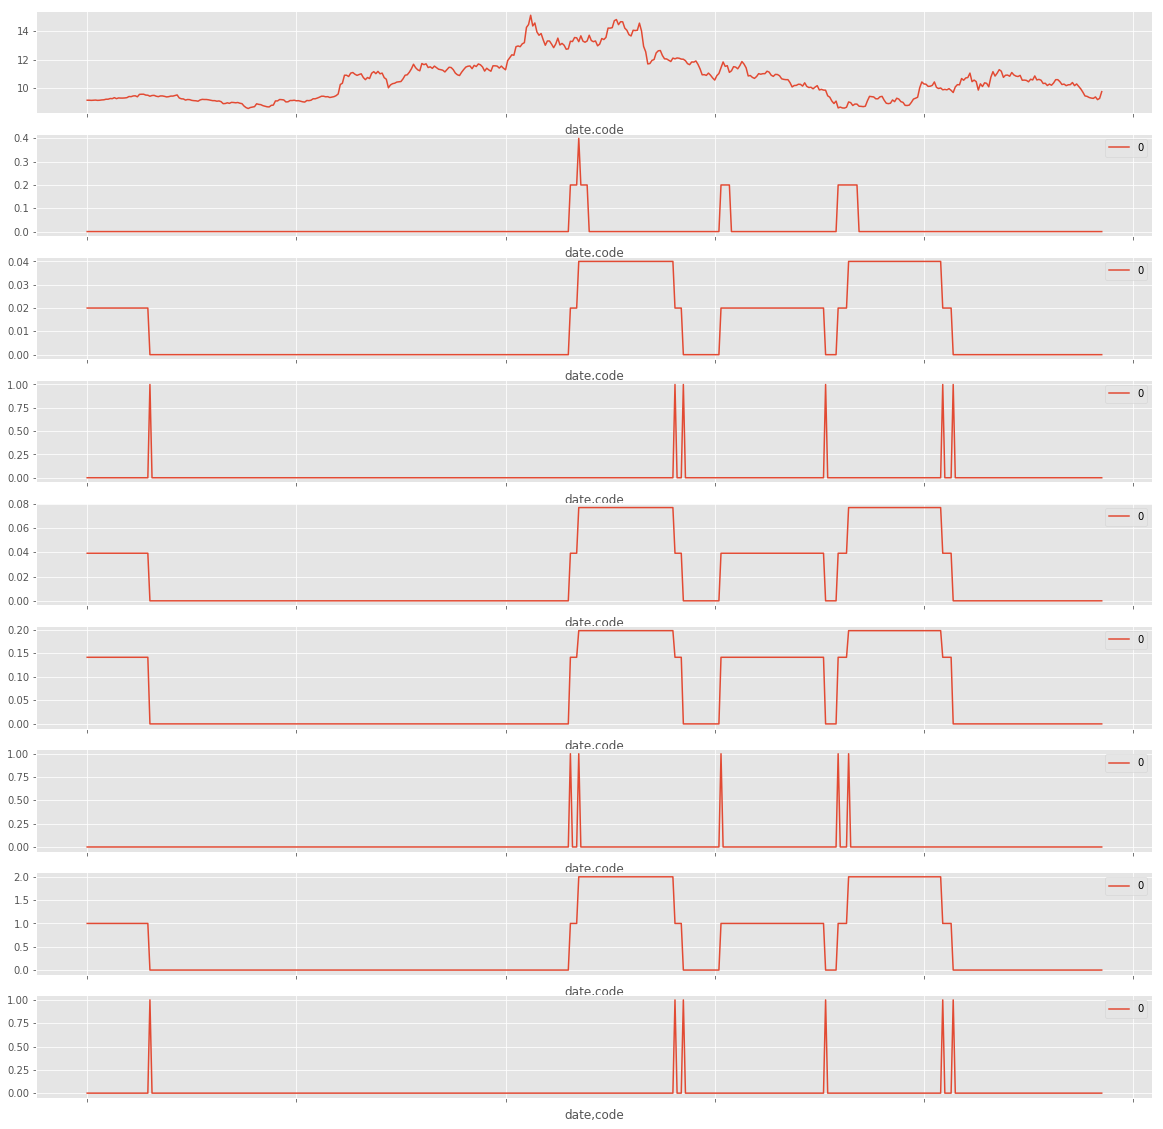

In [1]:
import time
import datetime
import QUANTAXIS as QA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from talib import *

tu = 910 #前面数字9代表总计9个图表，中间数字竖列，后一位代表图数列
qiehuan = 'gp'     #切换 zs：指数基金 ；gp：股票 ； bk ：板块
daima = ['000001'] #代码：如果设定 index为指数，stock 为股票
shijian = '1day' #时间：使用 1min/1day 切换分时和日线

if shijian == '1min':
    start_data = '2018-07-30 09:31:00' #开始——数据：设定数据起始缓冲解决不同轴问题
elif shijian == '1day':
    start_data = '2015-01-01'

if shijian == '1min': #依据shijian条件切换分时
    start = '2018-09-03 09:31:00' #min画图开始时间
    end = '2018-12-21 15:00:00' #min画图结束时间
elif shijian == '1day': #条件切换日线
    start = '2017-01-09' #day画图开始时间
    end = '2019-01-04 ' #day画图结束时间
    
if qiehuan == 'gp': #切换指数数据
    adv = QA.QA_fetch_stock_day_adv
elif qiehuan == 'zs': #切换股票数据 
    adv = QA.QA_fetch_index_day_adv
elif qiehuan == 'bk': #切换板块
    adv = QA.QA_fetch_stock_block_adv
    
def QA_indicator_TEST(dataframe): #指标通用通达信/同花顺/测试模块
    O = OPEN = dataframe.open #开盘价
    C = CLOSE = dataframe.close #收盘价
    H = HIGH = dataframe.high #最高价
    L = LOW = dataframe.low #最低价
    V = VOL = dataframe.volume #成交量
    A = AMOUNT = dataframe.amount #成交额
    #CODE = dataframe.code #股票代码
    #DATE = dataframe.date #股票日期
    MA = QA.MA#(Series, N)       #简单移动平均
    EMA = QA.EMA#(Series, N)      #异同移动平均
    SMA = QA.SMA#(Series, N, M=1) #累积平均
    DIFF = QA.DIFF#(Series, N=1)   #求导数和差分
    HHV = QA.HHV#(Series, N)      #求最高值
    LLV = QA.LLV#(Series, N)      #求最低值
    SUM = QA.SUM#(Series, N)      #求和
    ABS = QA.ABS#(Series)         #绝对值
    MAX = QA.MAX#(A, B)           #求最大
    MIN = QA.MIN#(A, B)           #求最小
    CROSS = QA.CROSS#(A, B)         #交叉上穿
    COUNT = QA.COUNT#(COND, N)      #取值设为常数    
    IF = QA.IF#(COND, V1, V2)    #逻辑判断
    #AND = QA.AND#(COND,V1,V2)   #逻辑判断 和
    #OR = QA.OR#(COND, V1,V2)    #逻辑判断 或
    REF = QA.REF#(Series, N)      #向前引用
    STD = QA.STD#(Series, N)      #估算标准差
    AVEDEV = QA.AVEDEV #(Series, N)   #平均绝对方差
    BBIBOLL = QA.BBIBOLL #(Series, N1, N2, N3, N4, N, M) #多空布林线
    #测试条件计算公式
    #成交量MACD
    vmacd = CROSS((2*((MA(V,12) - MA(V,26))-(MA((MA(V,12) - MA(V,26)),9)))), (((MA(V,12) - MA(V,26))-(MA((MA(V,12) - MA(V,26)),9)))/3)) #macd
    #成交量MA
    vma = CROSS(V*L, MA(V*L,7)) & CROSS(V*L, MA(V*L,10)) #成交量均线信号
    #成交量BOLL
    vboll = CROSS((V/(L)), ((MA(((V/(H))+(V/(L)))/2, 27)) - STD((V/(H)), 27) * 1.618)) #量BOLL信号
    #成交量KDJ
    vkdj = (CROSS(IF((EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))<50,((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1)))*3-(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))*2),(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))),(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))) | CROSS(IF((EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))<50,(EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1)))*3-(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))*2)),(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))))
    #成交量CCI
    #cci = CROSS(((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14))) & ((((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14))))-MA((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14)))),14))/(0.015*AVEDEV((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14)))),14)))),101 & -101)
    
    TEST =  (vkdj | vboll | vmacd) & vma # &:或；|：和；^: 异；~:反相；<<:左移动；>>:右移动
    return pd.DataFrame(TEST)
zhibiao = QA_indicator_TEST #QA.QA_indicator_KDJ(DataFrame, N=9, M1=3, M2=3) #指标：修改后位名称，设定指标 KDJ/MACD/CCI/BOLL。。。

if shijian == '1min': #分钟条件设定作图转换
    data = adv(daima,start_data,end,shijian) #设定指数imdex/股票stock
    res = data.add_func(zhibiao) #data.add_func(QA_indicator_MA,5) 基础指标计算格式
    res1 = QA.MA(res,1000) #1000周期 
    res2 = QA.MA(res,2000) 
    res3 = QA.REF(res,1000)
    res4 = QA.AVEDEV(res,1000)
    res5 = QA.STD(res,1000)
    res6 = QA.ABS(res)
    res7 = QA.SUM(res,1000)
    res8 = QA.REF(res,1000)
elif shijian == '1day': #日线条件转换作图转换
    data = adv(daima,start_data,end,shijian) #设定指数imdex/股票stock
    res = data.add_func(zhibiao)
    res1 = QA.MA(res,5) #5周期计算
    res2 = QA.MA(res,50) #10周期计算
    res3 = QA.REF(res,50)
    res4 = QA.AVEDEV(res,50)
    res5 = QA.STD(res,50)
    res6 = QA.ABS(res)
    res7 = QA.SUM(res,50)
    res8 = QA.REF(res,50)
fig=plt.figure(figsize=(20,20)) #图表长宽量 16，16
plt.style.use('ggplot') #不明白 参考：https://matplotlib.org/gallery/style_sheets/ggplot.html
plt.subplot(tu+1) #绘图：tu+N数列标记，图表0轴显示，后面依次累计
data.select_time(start,end).data.close.plot(use_index=True) #True/False
ax1=plt.subplot(tu+2)
res1.loc[slice(start,end)].plot(use_index=True,ax=ax1)
ax2=plt.subplot(tu+3)
res2.loc[slice(start,end)].plot(use_index=True,ax=ax2)
ax3=plt.subplot(tu+4)
res3.loc[slice(start,end)].plot(use_index=True,ax=ax3)
ax4=plt.subplot(tu+5)
res4.loc[slice(start,end)].plot(use_index=True,ax=ax4)
ax5=plt.subplot(tu+6)
res5.loc[slice(start,end)].plot(use_index=True,ax=ax5)
ax6=plt.subplot(tu+7)
res6.loc[slice(start,end)].plot(use_index=True,ax=ax6)
ax7=plt.subplot(tu+8)
res7.loc[slice(start,end)].plot(use_index=True,ax=ax7)
ax8=plt.subplot(tu+9)
res8.loc[slice(start,end)].plot(use_index=True,ax=ax8)
plt.show()


In [11]:
# TU 选股测试 均线/量BOLL  ，时间格式有问题，暂时没有解决

In [3]:
import time
import datetime
import numpy as np
import pandas as pd
from funcat import * #FUNCAT的同花顺/通达信指标模块：和：&，或：|，其他基本相同。可以使用指标选股！！！
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=60) #准备数据，倒推100天！！！
    yesterday=today-oneday  
    return yesterday
run_start_date = (getYesterday())#开始时间
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=1) #10天
    yesterday=today-oneday  
    return yesterday
open_start_date = (getYesterday())# 输出前N天日期
open_end_date = (time.strftime("20%y%m%d"))## 20yymmdd格式，输出当日日期
from funcat.data.tushare_backend import TushareDataBackend
from funcat.data.rqalpha_data_backend import RQAlphaDataBackend
backend = "RQ" #本地数据，如果修改tushare改tushare在线数据连接
if backend == "RQ":
    set_data_backend(RQAlphaDataBackend())
if backend == "TU":
    set_data_backend(TushareDataBackend())
elif backend == "QA":
    '''
    #QA.QA_fetch_stock_list_adv().code.list() # 获取全市场的股票代码    
    O = OPEN  #开盘价
    C = CLOSE  #收盘价
    H = HIGH  #最高价
    L = LOW  #最低价
    V = VOL  #成交量
    #A = AMOUNT  #成交额
    #CODE = dataframe.code #股票代码
    #DATE = dataframe.date #股票日期
    MA = QA.MA#(Series, N)       #简单移动平均
    EMA = QA.EMA#(Series, N)      #异同移动平均
    SMA = QA.SMA#(Series, N, M=1) #累积平均
    DIFF = QA.DIFF#(Series, N=1)   #求导数和差分
    HHV = QA.HHV#(Series, N)      #求最高值
    LLV = QA.LLV#(Series, N)      #求最低值
    SUM = QA.SUM#(Series, N)      #求和
    ABS = QA.ABS#(Series)         #绝对值
    MAX = QA.MAX#(A, B)           #求最大
    MIN = QA.MIN#(A, B)           #求最小
    CROSS = QA.CROSS#(A, B)         #交叉上穿
    COUNT = QA.COUNT#(COND, N)      #取值设为常数    
    IF = QA.IF#(COND, V1, V2)    #逻辑判断
    REF = QA.REF#(Series, N)      #向前引用
    STD = QA.STD#(Series, N)      #估算标准差
    AVEDEV = QA.AVEDEV #(Series, N)   #平均绝对方差
    BBIBOLL = QA.BBIBOLL #(Series, N1, N2, N3, N4, N, M) #多空布林线
    '''
    import QUANTAXIS as QA
    codelist = QA.QA_fetch_stock_list_adv().code.tolist()
    data = QA.QA_fetch_stock_day_adv(codelist,'2018-01-01','2018-12-21')
    
    set_data_backend(data)    
set_start_date(run_start_date)
'''
vmacd =( CROSS((2*((MA(V,12) - MA(V,26))-(MA((MA(V,12) - MA(V,26)),9)))), (((MA(V,12) - MA(V,26))-(MA((MA(V,12) - MA(V,26)),9)))/3)) )
vma = ( CROSS(V*L, MA(V*L,7)) & CROSS(V*L, MA(V*L,10)) )
vboll = ( CROSS((V/(L)), ((MA(((V/(H))+(V/(L)))/2, 27)) - STD((V/(H)), 27) * 1.618)) )
vkdj = ((CROSS(IF((EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))<50, \
    ((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1)))*3-(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100), \
    (9*2-1))),(3*2-1)))*2),(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))), \
    (3*2-1)))),(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))) | \
    CROSS(IF((EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))<50, \
    (EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))), \
    ((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1)))*3-(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100), \
    (9*2-1))),(3*2-1)))*2)),(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1))))) )
#cci = CROSS(((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14))) & \
    ((((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/ \
    (0.015*AVEDEV(V,14))))-MA((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/ \
    (0.015*AVEDEV(V,14)))),14))/(0.015*AVEDEV((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/ \
    (0.015*AVEDEV(V,14)))),14)))), 101 & -101)
TEST =  ( ((CROSS(IF((EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))), \
    (3*2-1)))<50,((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1)))*3-(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100), \
    (9*2-1))),(3*2-1)))*2),(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100), \
    (9*2-1))),(3*2-1)))),(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))) | \
    CROSS(IF((EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))<50,(EMA(((HHV(L,1)-LLV(L,27))/ \
    (HHV(H,27)-LLV(L,27))*100),(9*2-1))),((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100), \
    (9*2-1)))*3-(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))*2)), \
    (EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1))))) ) | \
    ( CROSS((V/(L)), ((MA(((V/(H))+(V/(L)))/2, 27)) - STD((V/(H)), 27) * 1.618)) ) | \
    ( CROSS((2*((MA(V,12) - MA(V,26))-(MA((MA(V,12) - MA(V,26)),9)))), (((MA(V,12) - MA(V,26))-(MA((MA(V,12) - MA(V,26)),9)))/3)) )) & \
    ( CROSS(V*L, MA(V*L,7)) & CROSS(V*L, MA(V*L,10)) )
'''    
print ("一句话选股开始时间：==》",("%s" % datetime.datetime.now().isoformat() )) 
print ("量集合 (vkdj | vboll | vmacd) & vma 选股开始=》")
select(
    lambda : ( ((CROSS(IF((EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100), \
(9*2-1))),(3*2-1)))<50,((EMA(((HHV(L,1)-LLV(L,27))/ \
(HHV(H,27)-LLV(L,27))*100),(9*2-1)))*3-(EMA((EMA(((HHV(L,1)-LLV(L,27))/ \
(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))*2),(EMA((EMA(((HHV(L,1)-LLV(L,27))/ \
(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))),(EMA((EMA(((HHV(L,1)-LLV(L,27))/ \
(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))) | CROSS(IF((EMA((EMA(((HHV(L,1)-LLV(L,27))/ \
(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))<50,(EMA(((HHV(L,1)-LLV(L,27))/ \
(HHV(H,27)-LLV(L,27))*100),(9*2-1))),((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100), \
(9*2-1)))*3-(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))*2)), \
(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1))))) ) | \
( CROSS((V/(L)), ((MA(((V/(H))+(V/(L)))/2, 27)) - STD((V/(H)), 27) * 1.618)) ) | \
( CROSS((2*((MA(V,12) - MA(V,26))-(MA((MA(V,12) - MA(V,26)),9)))), (((MA(V,12) - MA(V,26))-(MA((MA(V,12) - MA(V,26)),9)))/3)) )) & \
( CROSS(V*L, MA(V*L,7)) & CROSS(V*L, MA(V*L,10)) ), \
    start_date=(open_start_date), end_date=(open_end_date), \
)
print ("《=量集合 (vkdj | vboll | vmacd) & vma 选股结束")
'''
print ("量BOLL选股开始=》")
select(
    lambda : CROSS((VOL/(LOW)), ((MA(((VOL/(HIGH))+(VOL/(LOW)))/2, 27)) - STD((VOL/(HIGH)), 27) * 1.618)),
    start_date=(open_start_date), end_date=(open_end_date),
      )
print ("《=量BOLL选股结束")
print ("均线选股开始=》")
select(
    lambda : CROSS(LOW, MA(LOW,7)) and CROSS(HIGH, MA(LOW,10)),
    start_date=(open_start_date), end_date=(open_end_date),
      )
print ("《=均线选股结束")
'''
print ("《结束选股》读取结束时间：==》",("%s" % datetime.datetime.now().isoformat() )) 

一句话选股开始时间：==》 2018-12-28T10:51:41.649204
量集合 (vkdj | vboll | vmacd) & vma 选股开始=》
lambda : ( ((CROSS(IF((EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100), \
(9*2-1))),(3*2-1)))<50,((EMA(((HHV(L,1)-LLV(L,27))/ \
(HHV(H,27)-LLV(L,27))*100),(9*2-1)))*3-(EMA((EMA(((HHV(L,1)-LLV(L,27))/ \
(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))*2),(EMA((EMA(((HHV(L,1)-LLV(L,27))/ \
(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))),(EMA((EMA(((HHV(L,1)-LLV(L,27))/ \
(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))) | CROSS(IF((EMA((EMA(((HHV(L,1)-LLV(L,27))/ \
(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))<50,(EMA(((HHV(L,1)-LLV(L,27))/ \
(HHV(H,27)-LLV(L,27))*100),(9*2-1))),((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100), \
(9*2-1)))*3-(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))*2)), \
(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1))))) ) | \
( CROSS((V/(L)), ((MA(((V/(H))+(V/(L)))/2, 27)) - STD((V/(H)), 27) * 1.618)) ) | \
( 

In [ ]:
def ax_ HPYYX(ax2 ,mydf):
CLOSE=mydf['close']
LOW=mydf['low']
HIGH=mydf['high
OPEN=mydf['open'
VOL =mydf['volume']
C=mydf['close']
L=mydf[ 'low' ]
H=mydf['high'
Q=mydf['open'
V=mydf['volume' ]
#df #s Æ'Z ß #tushare dK#. ef,
df=mydf . copy()_
#KDJ pythonA57
#KDJ python HPYYX#bR
def HPYYX():
RSV= (C-LLV(L,9))/(HHV(H,9)-LLV(L,9))*100
FASTK=SMA(RSV,3,1)
RSVI= (HHV(H,9)-c)/ (HHV(H,9)-LLV(L,9))*100.
LC = REE(C,1)
RSI1=SMA(MAX(C-LC,0),13,1)/SMA(ABS(C-LC),13,1)*100
RSI2=SMA(MAX(C-LC,0),6, 1)/SMA(ABS(C-LC),6,1)*100
RSI3=IF(RSI2>50, RSI2*1. 05 , RSI2)
RSV3=(C-LLV(L,54))/ (HHV(H, 54)-LLV(L,54))*100
mydf[ 'YB']=100
HT=IF(RSI3>100 , mydf[ 'YB'], RSI3)
YIN=SMA( (SMA(RSV1,3,1)/2)*1.1,3,1)
YANG=SMA(((SMA(FASTK,3,1))/2+40)*1.1,3,1)
ZL=EMA(RSI2,13)
return YIN, YANG,HT,ZL
##ÆKDJ#bž, ë@K. D, JF5'.
YIN, YANG,HT ,ZL=HPYYX()
df = df.join(pd . Series( YIN, name= ' YIN' ))
df = df.join(pd . Series( YANG, name= 'YANG' ))
df = df.join(pd.Series( ZL,name= 'ZL'))
df = df.join(pd.Series( HT,name= 'HT'))
ax2. plot(df .date.values, df.YIN.values, color= 'b', lw=1, label=" $YIN$")
ax2. plot(df . date.values,df .YANG.values, color= 'b', lw=1, label=" $YANG$" ;
ax2. plot(df . date.values, df. ZL.values, color= g· cns[ ' cornflowerblue'], lw=3, label="$ZL$")
ax2. plot(df.date.values, df.HT.values, color= g.cns['plum'], lw=2,label="$HT$" ,linestyle=':')
plt. gca() .yaxis.set_ major_ locator (mticker .MaxNLocator(prune=' upper' ))
ax2. tick_ params(axis='x', colors=g. utg)
ax2. tick_ params(axis='y', colors=g.utg)
ax2. grid(True, color='
plt.ylabel( 'HPYYX', color=g.utg)
рlt.lеgеnd() # ЕлВФб L#ÉѪẾ.É .
ax2. yaxis .set_ major, locator(mticker .MaxNLocator(nbins=6, prune= 'upper'))
return ax2
